In [1]:
import plotly.express as px

In [2]:
from glob import glob
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# for year in range(2013,2025):
#     for month in range(1,13,1):
#         print(year, month)
#         try:
#             url = f'https://smn.conagua.gob.mx/tools/RESOURCES/com_archivo_datos_resumenes/{year}{month:02d}010000Lluv.csv'
#             filename = f'./lluvia/{year}{month:02d}010000LLuv.csv'
#             urllib.request.urlretrieve(url, filename)
#         except:
#             pass

In [4]:
paths = glob("./lluvia/*")
len(paths)

141

In [5]:
for path in paths:
    df = pd.read_csv(path, encoding='latin-1')
    print(path, df.columns)

./lluvia\201301010000LLuv.csv Index(['LON', '   LAT', '   ESTADO', '     CVE_SIH', 'NOMBRE_ESTACION', 'ENE'], dtype='object')
./lluvia\201302010000LLuv.csv Index(['  LON', '   LAT', '   ESTADO', '     CVE_SIH', 'NOMBRE_ESTACION',
       ' FEB'],
      dtype='object')
./lluvia\201303010000LLuv.csv Index(['  LON', '   LAT', '   ESTADO', '     CVE_SIH', 'NOMBRE_ESTACION',
       ' MAR'],
      dtype='object')
./lluvia\201304010000LLuv.csv Index(['  LON', '   LAT', '   ESTADO', '     CVE_SIH', 'NOMBRE_ESTACION',
       ' ABR'],
      dtype='object')
./lluvia\201305010000LLuv.csv Index(['  LON', '   LAT', '   ESTADO', '     CVE_SIH', 'NOMBRE_ESTACION',
       ' MAY'],
      dtype='object')
./lluvia\201306010000LLuv.csv Index(['LON', 'LAT', 'ESTADO', 'CVE_SIH', 'NOMBRE_ESTACION', 'JUN'], dtype='object')
./lluvia\201307010000LLuv.csv Index(['LON', 'LAT', 'ESTADO', 'CVE_SIH', 'NOMBRE_ESTACION', 'JUL'], dtype='object')
./lluvia\201308010000LLuv.csv Index(['LON', 'LAT', 'ESTADO', 'CVE_SIH', 'NOM

In [6]:
def read_lluvia(path):
    try:
        df = pd.read_csv(path, encoding='latin-1', usecols=[2,5])
        df=df.groupby(by="EDO").mean()
        df = df.T
        year = path[9:13]
        month = path[13:15]
        df["time"] = year+month
        return df
        
    except:
        pass
    # except:
    #     fail.append(path)

In [7]:
data = pd.concat([(read_lluvia(path)) for path in paths])

In [8]:
data

EDO,AGS,CAMP,CDMX,CHIH,CHIS,COAH,COL,DGO,GRO,GTO,...,ZAC,time,BC,BCS,NAY,SON,DF,TAMS,TAMPS,HDO
nov-14,22.425000,30.660000,10.644186,14.300000,124.658974,95.177778,162.466667,59.450000,35.600000,18.408333,...,27.833333,201411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dic-14,7.058333,28.873333,24.948837,14.500000,25.326471,16.600000,18.575000,7.075000,12.766667,7.891667,...,17.550000,201412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ene-15,6.281818,69.806667,0.586364,30.074194,99.387234,20.042105,0.000000,32.175000,0.259375,4.015385,...,12.144186,201501,12.600000,17.600000,1.916667,39.564706,NaN,NaN,NaN,NaN
feb-15,33.195652,20.831250,4.622727,37.535484,37.898039,30.142105,74.406250,51.242857,1.593750,12.071795,...,53.015909,201502,13.500000,12.233333,132.266667,28.097059,NaN,NaN,NaN,NaN
mar-15,93.104167,83.500000,46.022727,52.293548,66.710000,75.647368,174.987500,80.753571,32.596875,122.217949,...,84.734091,201503,34.800000,49.533333,79.522222,44.885294,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
may-24,4.020714,12.967647,NaN,0.000345,64.451856,17.792759,0.000000,3.139722,9.089333,9.116400,...,3.118387,202405,1.076957,0.005000,0.000000,0.000000,37.176420,NaN,28.366909,NaN
jun-24,110.282857,451.218125,NaN,27.167333,410.955455,52.992222,56.072222,44.004000,123.308913,120.883061,...,79.249459,202406,0.059091,5.024500,166.997500,20.673800,119.802289,NaN,340.995818,NaN
jul-24,196.675833,134.650625,NaN,97.305455,271.778478,54.991364,240.241765,158.849667,220.376000,211.594419,...,155.325152,202407,1.475333,2.263529,256.389000,90.862000,153.808049,NaN,148.474792,NaN
sep-24,77.737692,208.306250,NaN,60.343043,252.015889,23.919167,221.443529,57.445161,191.620213,113.483061,...,66.091515,202408,2.820000,19.232632,248.685385,82.011951,263.277875,NaN,60.667200,NaN


In [9]:
data.index = pd.to_datetime(data.time, format="%Y%m")

In [10]:
data.fillna(0, inplace=True)

In [11]:
data.columns

Index(['AGS', 'CAMP', 'CDMX', 'CHIH', 'CHIS', 'COAH', 'COL', 'DGO', 'GRO',
       'GTO', 'HGO', 'JAL', 'MEX', 'MICH', 'MOR', 'NL', 'OAX', 'PUE', 'QRO',
       'QROO', 'SIN', 'SLP', 'TAB', 'TAMP', 'TLAX', 'VER', 'YUC', 'ZAC',
       'time', 'BC', 'BCS', 'NAY', 'SON', 'DF', 'TAMS', 'TAMPS', 'HDO'],
      dtype='object', name='EDO')

In [25]:
# data

In [13]:
data.drop("time", axis=1, inplace=True)

In [14]:
data["TAMP"] = data.TAMP + data.TAMPS
data.drop(["TAMPS"], axis=1, inplace=True)

In [15]:
data["HGO"] = data.HGO + data.HDO
data.drop(["HDO"], axis=1, inplace=True)

In [16]:
data.columns

Index(['AGS', 'CAMP', 'CDMX', 'CHIH', 'CHIS', 'COAH', 'COL', 'DGO', 'GRO',
       'GTO', 'HGO', 'JAL', 'MEX', 'MICH', 'MOR', 'NL', 'OAX', 'PUE', 'QRO',
       'QROO', 'SIN', 'SLP', 'TAB', 'TAMP', 'TLAX', 'VER', 'YUC', 'ZAC', 'BC',
       'BCS', 'NAY', 'SON', 'DF', 'TAMS'],
      dtype='object', name='EDO')

In [17]:
data["CDMX"] = data.CDMX + data.DF
data.drop(["DF"], axis=1, inplace=True)
data.columns

Index(['AGS', 'CAMP', 'CDMX', 'CHIH', 'CHIS', 'COAH', 'COL', 'DGO', 'GRO',
       'GTO', 'HGO', 'JAL', 'MEX', 'MICH', 'MOR', 'NL', 'OAX', 'PUE', 'QRO',
       'QROO', 'SIN', 'SLP', 'TAB', 'TAMP', 'TLAX', 'VER', 'YUC', 'ZAC', 'BC',
       'BCS', 'NAY', 'SON', 'TAMS'],
      dtype='object', name='EDO')

In [18]:
data["NAY"] = data.NAY + data.COL
data.drop(["COL"], axis=1, inplace=True)
data

EDO,AGS,CAMP,CDMX,CHIH,CHIS,COAH,DGO,GRO,GTO,HGO,...,TAMP,TLAX,VER,YUC,ZAC,BC,BCS,NAY,SON,TAMS
time,,,,,,,,,,,,,,,,,,,,,
2014-11-01,22.425000,30.660000,10.644186,14.300000,124.658974,95.177778,59.450000,35.600000,18.408333,33.300000,...,48.163636,8.414286,102.547143,37.343478,27.833333,0.000000,0.000000,162.466667,0.000000,0.0
2014-12-01,7.058333,28.873333,24.948837,14.500000,25.326471,16.600000,7.075000,12.766667,7.891667,30.320000,...,33.295349,26.685714,57.671014,16.321739,17.550000,0.000000,0.000000,18.575000,0.000000,0.0
2015-01-01,6.281818,69.806667,0.586364,30.074194,99.387234,20.042105,32.175000,0.259375,4.015385,30.484211,...,34.635714,8.187500,94.827273,40.045455,12.144186,12.600000,17.600000,1.916667,39.564706,0.0
2015-02-01,33.195652,20.831250,4.622727,37.535484,37.898039,30.142105,51.242857,1.593750,12.071795,20.284211,...,19.170455,3.028571,25.511688,36.377273,53.015909,13.500000,12.233333,206.672917,28.097059,0.0
2015-03-01,93.104167,83.500000,46.022727,52.293548,66.710000,75.647368,80.753571,32.596875,122.217949,122.468421,...,79.146667,84.062500,125.030769,34.509091,84.734091,34.800000,49.533333,254.509722,44.885294,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-01,4.020714,12.967647,37.176420,0.000345,64.451856,17.792759,3.139722,9.089333,9.116400,13.064286,...,28.366909,66.900000,4.861545,1.331579,3.118387,1.076957,0.005000,0.000000,0.000000,0.0
2024-06-01,110.282857,451.218125,119.802289,27.167333,410.955455,52.992222,44.004000,123.308913,120.883061,220.760455,...,340.995818,139.666667,373.514818,392.437619,79.249459,0.059091,5.024500,223.069722,20.673800,0.0
2024-07-01,196.675833,134.650625,153.808049,97.305455,271.778478,54.991364,158.849667,220.376000,211.594419,214.753684,...,148.474792,173.262500,291.051935,135.249048,155.325152,1.475333,2.263529,496.630765,90.862000,0.0


In [23]:
data = data.reindex(sorted(data.columns), axis=1)

In [33]:
data

EDO,AGS,BC,BCS,CAMP,CDMX,CHIH,CHIS,COAH,DGO,GRO,...,SIN,SLP,SON,TAB,TAMP,TAMS,TLAX,VER,YUC,ZAC
time,,,,,,,,,,,,,,,,,,,,,
2014-11-01,22.425000,0.000000,0.000000,30.660000,10.644186,14.300000,124.658974,95.177778,59.450000,35.600000,...,8.400000,27.050000,0.000000,284.993750,48.163636,0.0,8.414286,102.547143,37.343478,27.833333
2014-12-01,7.058333,0.000000,0.000000,28.873333,24.948837,14.500000,25.326471,16.600000,7.075000,12.766667,...,0.200000,45.183333,0.000000,39.246667,33.295349,0.0,26.685714,57.671014,16.321739,17.550000
2015-01-01,6.281818,12.600000,17.600000,69.806667,0.586364,30.074194,99.387234,20.042105,32.175000,0.259375,...,8.541935,42.576471,39.564706,318.750000,34.635714,0.0,8.187500,94.827273,40.045455,12.144186
2015-02-01,33.195652,13.500000,12.233333,20.831250,4.622727,37.535484,37.898039,30.142105,51.242857,1.593750,...,47.767742,24.415789,28.097059,89.637500,19.170455,0.0,3.028571,25.511688,36.377273,53.015909
2015-03-01,93.104167,34.800000,49.533333,83.500000,46.022727,52.293548,66.710000,75.647368,80.753571,32.596875,...,23.509677,127.252632,44.885294,151.856250,79.146667,0.0,84.062500,125.030769,34.509091,84.734091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-01,4.020714,1.076957,0.005000,12.967647,37.176420,0.000345,64.451856,17.792759,3.139722,9.089333,...,0.000000,3.685909,0.000000,49.733333,28.366909,0.0,66.900000,4.861545,1.331579,3.118387
2024-06-01,110.282857,0.059091,5.024500,451.218125,119.802289,27.167333,410.955455,52.992222,44.004000,123.308913,...,24.815625,263.958261,20.673800,285.331250,340.995818,0.0,139.666667,373.514818,392.437619,79.249459
2024-07-01,196.675833,1.475333,2.263529,134.650625,153.808049,97.305455,271.778478,54.991364,158.849667,220.376000,...,123.891522,390.373810,90.862000,172.276471,148.474792,0.0,173.262500,291.051935,135.249048,155.325152


<Axes: xlabel='EDO', ylabel='EDO'>

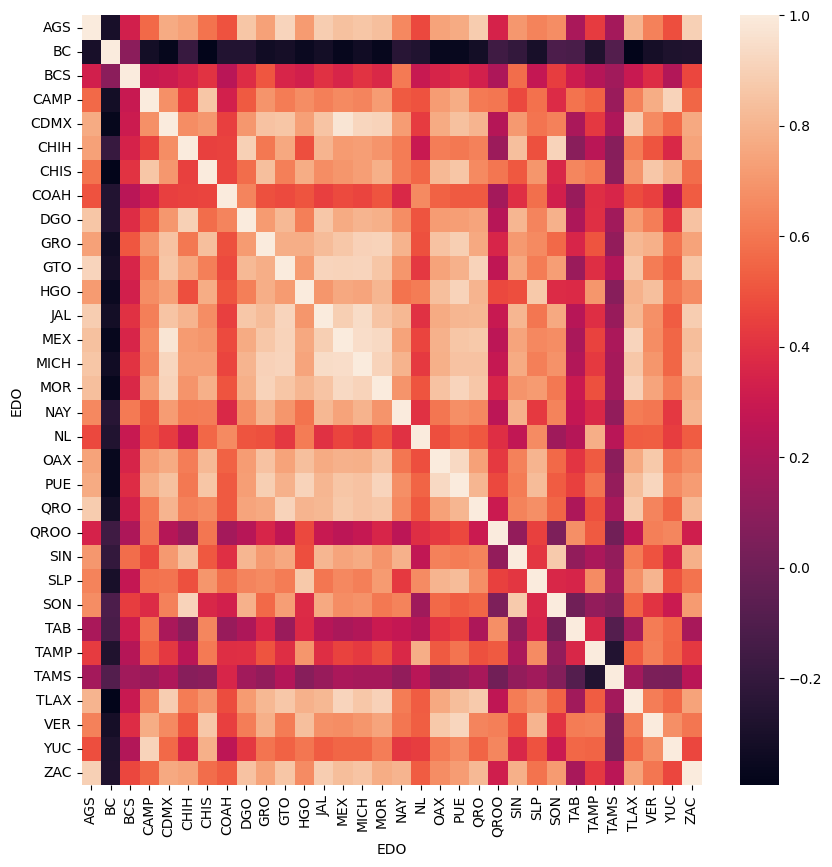

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr())

In [20]:
# plt.figure(figsize=(15,5))
# sns.heatmap(data)

In [21]:
# def read_lluvia(path):
#     print(path)
#     try:
#         df = pd.read_csv(path, encoding='latin-1')
#         if "EDO" in df.columns:
#             df = pd.read_csv(path, encoding='latin-1', usecols=[2,5])
#             df=df.groupby(by="EDO").sum()
#             df = df.T
#             year = path[9:13]
#             month = path[13:15]
#             df["time"] = year+month
#             return df
            
#         elif 'ESTADO' in df.columns:
#             df = pd.read_csv(path, encoding='latin-1', usecols=[2,5])
#             df=df.groupby(by="ESTADO").sum()
#             df = df.T
#             year = path[9:13]
#             month = path[13:15]
#             df["time"] = year+month
            
#             return df
#         elif '   ESTADO' in df.columns:
#             df = pd.read_csv(path, encoding='latin-1', usecols=[2,5])
#             df=df.groupby(by='   ESTADO').sum()
#             df = df.T
#             year = path[9:13]
#             month = path[13:15]
#             df["time"] = year+month
#     except:
#         pass
#     # except:
#     #     fail.append(path)